In [1]:
import cv2
import numpy as np
import numbers
import matplotlib.pyplot as plt

In [2]:
# Load an image from file
image = cv2.imread('C:/Users/MSD/Downloads/BRAIN.jpg')

def global_threshold(image, threshold_value=127, max_value=255):
    """
    Apply global thresholding to a grayscale image.

    Parameters:
        image (numpy.ndarray): Input grayscale image.
        threshold_value (int): Threshold value.
        max_value (int): Maximum value for pixels above the threshold.

    Returns:
        numpy.ndarray: Thresholded image.
    """
    thresholded = np.where(image > threshold_value, max_value, 0).astype(np.uint8)
    return thresholded

def local_threshold(image, blockSize=11, C=2, max_value=255):
    """
    Apply local thresholding to a grayscale image.

    Parameters:
        image (numpy.ndarray): Input grayscale image.
        blockSize (int): Size of the local neighborhood for computing the threshold value.
        C (int): Constant subtracted from the mean or weighted mean.
        max_value (int): Maximum value for pixels above the threshold.

    Returns:
        numpy.ndarray: Thresholded image.
    """
    thresholded = np.zeros_like(image, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Define the region of interest
            roi = image[max(0, i - blockSize // 2): min(image.shape[0], i + blockSize // 2),
                        max(0, j - blockSize // 2): min(image.shape[1], j + blockSize // 2)]
            # Compute the threshold value for the region
            threshold_value = np.mean(roi) - C
            # Apply thresholding
            thresholded[i, j] = max_value if image[i, j] > threshold_value else 0
    return thresholded

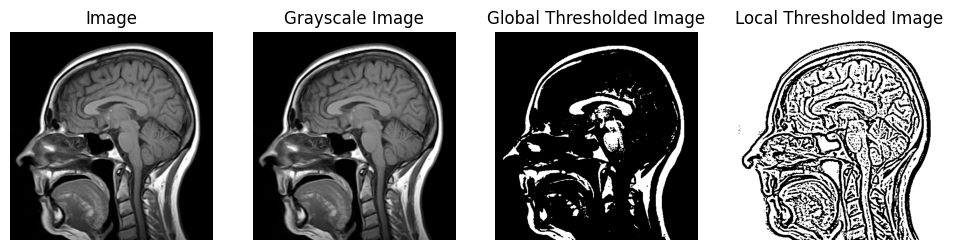

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply global thresholding
global_thresholded = global_threshold(gray_image)

# Apply local thresholding
local_thresholded = local_threshold(gray_image)

# Display the images in the notebook
plt.figure(figsize=(12, 8))

# Original Image
# Plot the image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.axis('off')

# Grayscale Image
plt.subplot(1, 4, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Global Thresholded Image
plt.subplot(1, 4, 3)
plt.imshow(global_thresholded, cmap='gray')
plt.title('Global Thresholded Image')
plt.axis('off')

# Local Thresholded Image
plt.subplot(1, 4, 4)
plt.imshow(local_thresholded, cmap='gray')
plt.title('Local Thresholded Image')
plt.axis('off')

plt.show()

In [4]:
# Optimal thresholding
_, optimal_threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the result
cv2.imshow('Optimal Thresholding', optimal_threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Otsu thresholding
_, otsu_threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the result
cv2.imshow('Otsu Thresholding', otsu_threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# Optimal thresholding (Local)
optimal_threshold_local = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the result
cv2.imshow('Optimal Thresholding (Local)', optimal_threshold_local)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# Otsu thresholding (Local)
otsu_threshold_local = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the result
cv2.imshow('Otsu Thresholding (Local)', otsu_threshold_local)
cv2.waitKey(0)
cv2.destroyAllWindows()

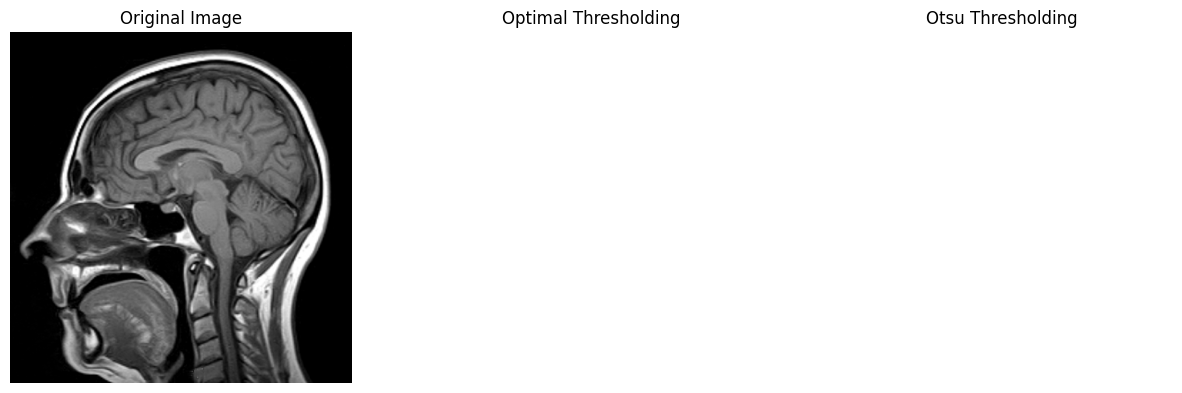

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def optimal_threshold(img):
    hist = np.histogram(img, bins=256, range=(0, 256))[0] / (img.shape[0] * img.shape[1])
    cum_sum = np.cumsum(hist)
    bins = np.arange(256)

    variances = np.zeros(256)
    for t in range(256):
        q1 = cum_sum[t]
        q2 = 1 - q1
        if q1 == 0 or q2 == 0:
            continue
        mu1 = np.sum(bins[:t] * hist[:t]) / q1
        mu2 = np.sum(bins[t:] * hist[t:]) / q2
        variances[t] = q1 * q2 * (mu1 - mu2) ** 2

    optimal_threshold = np.argmax(variances)
    binary_img = img > optimal_threshold
    return binary_img

def otsu_threshold(img):
    hist = np.histogram(img, bins=256, range=(0, 256))[0] / (img.shape[0] * img.shape[1])
    cum_sum = np.cumsum(hist)
    bins = np.arange(256)

    variances = np.zeros(256)
    for t in range(256):
        q1 = cum_sum[t]
        q2 = 1 - q1
        if q1 == 0 or q2 == 0:
            continue
        mu1 = np.sum(bins[:t] * hist[:t]) / q1
        mu2 = np.sum(bins[t:] * hist[t:]) / q2
        variances[t] = q1 * q2 * (mu1 - mu2) ** 2

    otsu_threshold = np.argmax(variances)
    binary_img = img > otsu_threshold
    return binary_img

# Read image in grayscale using cv2
image = cv2.imread('C:/Users/MSD/Downloads/BRAIN.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Optimal thresholding
optimal_binary = optimal_threshold(gray_image)

# Otsu thresholding
otsu_binary = otsu_threshold(gray_image)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(optimal_binary, cmap='binary')
axs[1].set_title('Optimal Thresholding')

axs[2].imshow(otsu_binary, cmap='binary')
axs[2].set_title('Otsu Thresholding')

for ax in axs:
    ax.axis('off')

plt.show()


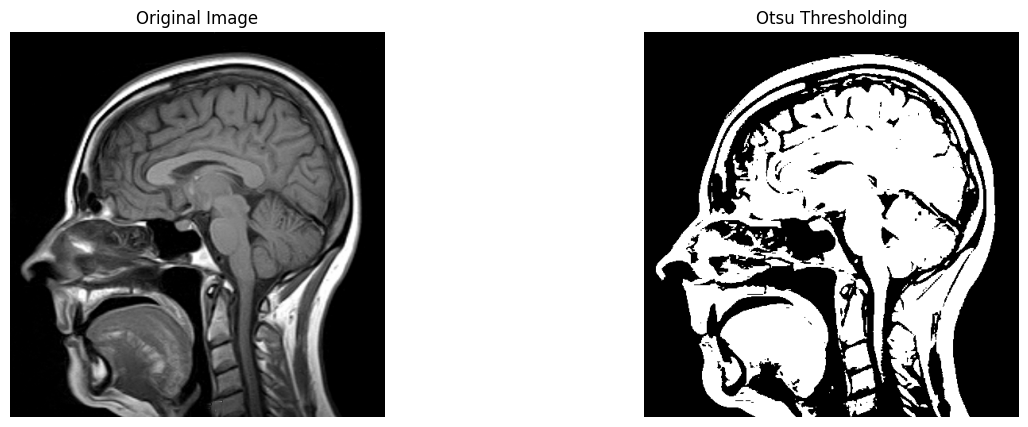

In [9]:
def _compute_otsu_criteria(im, th):
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one of the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0

    return weight0 * var0 + weight1 * var1

def otsuThresholding(img: np.ndarray) -> np.ndarray:
    threshold_range = range(np.max(img)+1)
    criterias = np.array([_compute_otsu_criteria(img, th) for th in threshold_range])

    # best threshold is the one minimizing the Otsu criteria
    best_threshold = threshold_range[np.argmin(criterias)]

    binary = img
    binary[binary < best_threshold] = 0
    binary[binary >= best_threshold] = 255

    return binary

image = cv2.imread('C:/Users/MSD/Downloads/BRAIN.jpg')
img = cv2.imread('C:/Users/MSD/Downloads/BRAIN.jpg')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Otsu thresholding
otsu_binary = otsuThresholding(gray_image)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')



axs[1].imshow(cv2.cvtColor(otsu_binary, cv2.COLOR_GRAY2BGR), cmap='binary')
axs[1].set_title('Otsu Thresholding')

for ax in axs:
    ax.axis('off')

plt.show()


In [20]:
import cv2
import numpy as np

def optimal_thresholding(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Initialize threshold with a random value (e.g., midpoint of intensity range)
    min_intensity = np.min(gray_image)
    max_intensity = np.max(gray_image)
    threshold = (min_intensity + max_intensity) // 2
    
    # Iterate until convergence (threshold value stabilizes)
    while True:
        # Classify pixels into foreground (class 1) and background (class 2) based on current threshold
        foreground_pixels = gray_image[gray_image > threshold]
        background_pixels = gray_image[gray_image <= threshold]
        
        # Calculate mean intensity values of the two classes
        mean_foreground = np.mean(foreground_pixels)
        mean_background = np.mean(background_pixels)
        
        # Calculate new threshold as the average of mean intensities
        new_threshold = (mean_foreground + mean_background) / 2
        
        # Check convergence: if new threshold is close to the old threshold, break the loop
        if np.abs(new_threshold - threshold) < 1e-3:
            break
        
        # Update the threshold
        threshold = new_threshold
    
    # Apply the final threshold to the grayscale image
    thresholded_image = (gray_image > threshold).astype(np.uint8) * 255
    
    return thresholded_image

# Read an image using OpenCV
image_path = 'C:/Users/Dell Inspiron 15/Documents/GitHub/Segmentor/images/SUDOKU.jpg'
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Unable to read the image at '{image_path}'")
else:
    # Apply optimal thresholding to the loaded image
    result_image = optimal_thresholding(original_image)
    
    # Display or save the resulting thresholded image
    cv2.imshow('Thresholded Image', result_image)
    cv2.waitKey(0)  # Wait for a key press to close the window
    cv2.destroyAllWindows()


    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('Original Image')



    axs[1].imshow(result_image, cmap='binary')
    axs[1].set_title('Optimal Thresholding')

    for ax in axs:
        ax.axis('off')

    plt.show()


C:\Users\Dell Inspiron 15\AppData\Local\Temp\ipykernel_15240\4213559030.py:11: RuntimeWarning: overflow encountered in scalar add
  threshold = (min_intensity + max_intensity) // 2
c:\Users\Dell Inspiron 15\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dell Inspiron 15\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

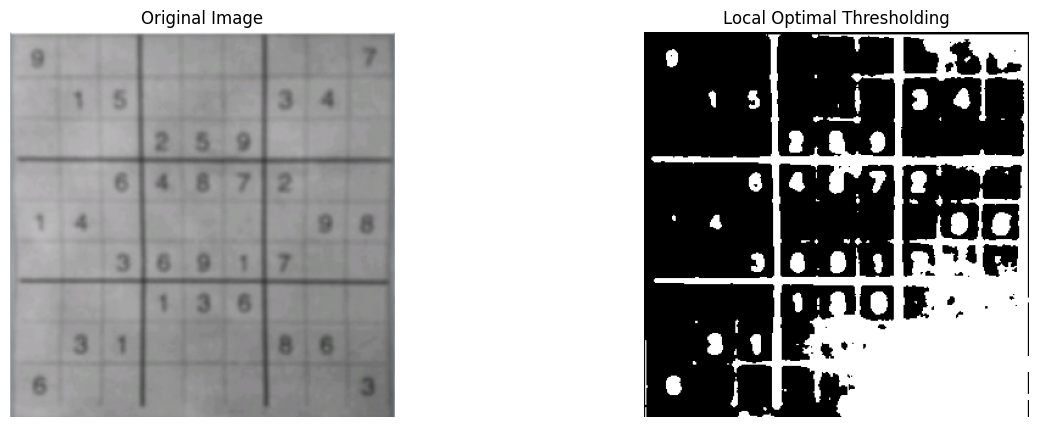

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def local_optimal_thresholding(image, block_size=11):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate padding size based on block size
    half_block_size = block_size // 2
    padded_image = np.pad(gray_image, ((half_block_size, half_block_size), (half_block_size, half_block_size)), mode='reflect')
    
    # Generate local neighborhood arrays using efficient array slicing
    height, width = gray_image.shape
    local_regions = np.lib.stride_tricks.sliding_window_view(padded_image, (block_size, block_size))
    
    # Calculate initial thresholds as the midpoints of local intensity ranges
    local_min_intensity = local_regions.min(axis=(2, 3))
    local_max_intensity = local_regions.max(axis=(2, 3))
    local_thresholds = (local_min_intensity + local_max_intensity) // 2
    
    # Iterate until convergence (threshold values stabilize)
    while True:
        # Classify pixels into foreground (class 1) and background (class 2) based on current thresholds
        foreground_pixels = gray_image > local_thresholds
        background_pixels = ~foreground_pixels
        
        # Calculate mean intensity values of the two classes
        mean_foreground = np.mean(gray_image[foreground_pixels])
        mean_background = np.mean(gray_image[background_pixels])
        
        # Calculate new thresholds as the average of mean intensities
        new_thresholds = (mean_foreground + mean_background) / 2
        
        # Check convergence: if new thresholds are close to the old thresholds, break the loop
        if np.allclose(new_thresholds, local_thresholds, atol=1e-3):
            break
        
        # Update the local thresholds
        local_thresholds = new_thresholds
    
    # Apply the final local thresholds to generate the thresholded image
    thresholded_image = (gray_image > local_thresholds).astype(np.uint8) * 255
    
    return thresholded_image

# Read an image using OpenCV
image_path = "C:/Users/Dell Inspiron 15/Documents/GitHub/Segmentor/images/SUDOKU.jpg"
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Unable to read the image at '{image_path}'")
else:
    # Apply local optimal thresholding to the loaded image
    result_image = local_optimal_thresholding(original_image)
    
    # Display the original and thresholded images using matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB), cmap='gray')
    axs[0].set_title('Original Image')
    
    axs[1].imshow(result_image, cmap='binary')
    axs[1].set_title('Local Optimal Thresholding')
    
    for ax in axs:
        ax.axis('off')
    
    plt.show()


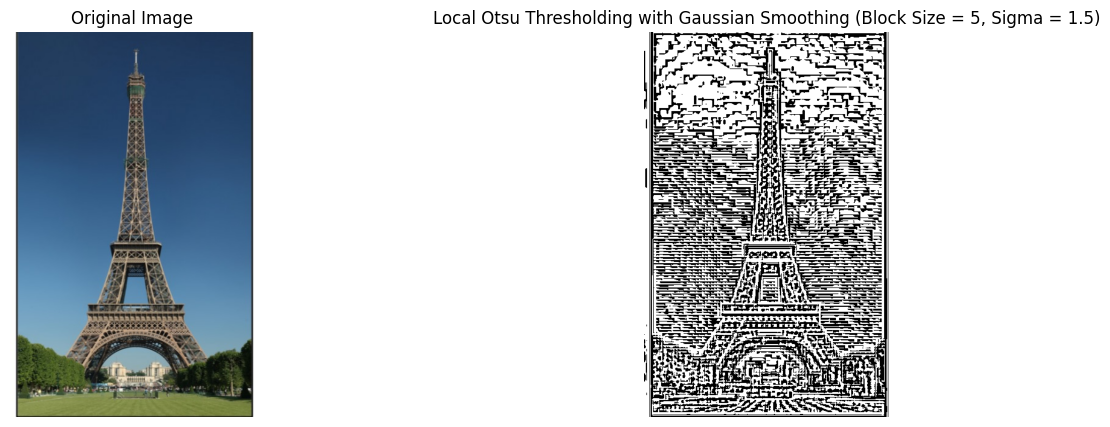

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def _compute_otsu_criteria(im, th):
    # Create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # Compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # If one of the classes is empty, return infinity to exclude this threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # Find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # Compute variance of these classes
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0

    return weight0 * var0 + weight1 * var1

def local_otsu_thresholding(img: np.ndarray, block_size: int, sigma: float) -> np.ndarray:
    # Convert the image to grayscale if needed
    if len(img.shape) > 2:
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = img
    
    # Apply Gaussian smoothing to the grayscale image
    blurred_image = cv2.GaussianBlur(gray_image, (0, 0), sigmaX=sigma, sigmaY=sigma)
    
    # Get image dimensions
    height, width = gray_image.shape
    
    # Initialize the output binary image
    binary_image = np.zeros_like(gray_image)
    
    # Loop over the image with specified block size
    for y in range(0, height, block_size):
        for x in range(0, width, block_size):
            # Define the current block within the smoothed image
            block = blurred_image[y:y+block_size, x:x+block_size]
            
            # Calculate the Otsu threshold for the current block
            threshold_range = range(np.min(block), np.max(block) + 1)
            criterias = np.array([_compute_otsu_criteria(block, th) for th in threshold_range])
            best_threshold = threshold_range[np.argmin(criterias)]
            
            # Apply threshold to the current block and assign to the output image
            binary_block = np.zeros_like(block)
            binary_block[block >= best_threshold] = 255
            
            # Calculate block bounds for assignment
            block_height, block_width = binary_block.shape
            end_y = min(y + block_size, height)
            end_x = min(x + block_size, width)
            binary_image[y:end_y, x:end_x] = binary_block[:end_y-y, :end_x-x]
    
    return binary_image

# Load the input image
image = cv2.imread('C:/Users/Dell Inspiron 15/Documents/GitHub/Segmentor/images/TOWER.jpg')

# Parameters for local Otsu thresholding
block_size = 5
sigma = 1.5  # Standard deviation for Gaussian smoothing

# Perform local Otsu thresholding with smoothing
otsu_binary = local_otsu_thresholding(image, block_size, sigma)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')

axs[1].imshow(otsu_binary, cmap='gray')
axs[1].set_title(f'Local Otsu Thresholding with Gaussian Smoothing (Block Size = {block_size}, Sigma = {sigma})')

for ax in axs:
    ax.axis('off')

plt.show()


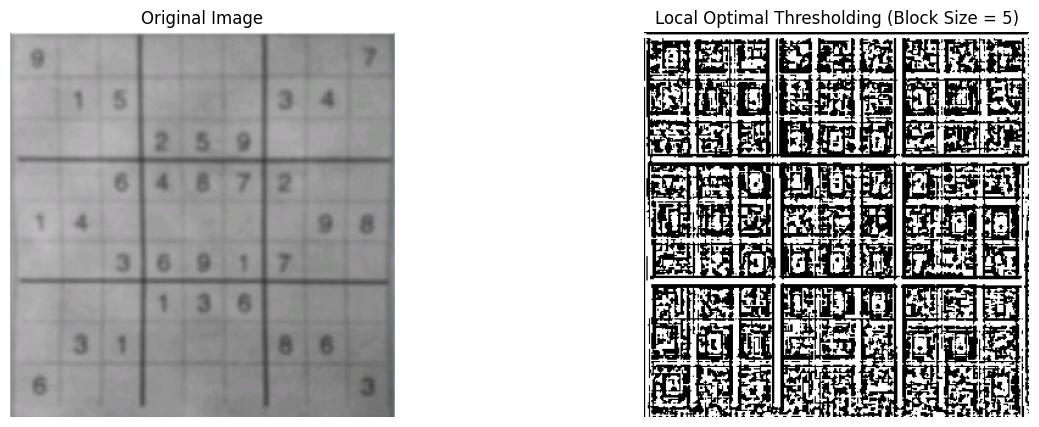

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def local_optimal_thresholding(image, block_size):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Get image dimensions
    height, width = gray_image.shape
    
    # Initialize the output binary image
    binary_image = np.zeros_like(gray_image, dtype=np.uint8)
    
    # Iterate over the image in blocks of specified size
    for y in range(0, height, block_size):
        for x in range(0, width, block_size):
            # Define the current block within the image
            block = gray_image[y:y+block_size, x:x+block_size]
            
            # Apply optimal thresholding to the current block
            block_thresholded = apply_optimal_thresholding(block)
            
            # Assign the thresholded block to the corresponding region in the binary image
            block_height, block_width = block_thresholded.shape
            binary_image[y:y+block_height, x:x+block_width] = block_thresholded
    
    return binary_image

def apply_optimal_thresholding(block):
    # Check if block is empty (all pixels are the same)
    if np.all(block == block[0, 0]):
        return np.zeros_like(block, dtype=np.uint8)  # Return all zeros for empty block
    
    # Compute the threshold using mean intensity of the block
    threshold = np.mean(block)
    
    # Iterate until convergence (threshold value stabilizes)
    while True:
        # Classify pixels into foreground (class 1) and background (class 2) based on current threshold
        foreground_pixels = block[block > threshold]
        background_pixels = block[block <= threshold]
        
        # Check if any class is empty
        if len(foreground_pixels) == 0 or len(background_pixels) == 0:
            return np.zeros_like(block, dtype=np.uint8)  # Return all zeros if any class is empty
        
        # Calculate mean intensity values of the two classes
        mean_foreground = np.mean(foreground_pixels)
        mean_background = np.mean(background_pixels)
        
        # Calculate new threshold as the average of mean intensities
        new_threshold = (mean_foreground + mean_background) / 2.0
        
        # Check convergence: if new threshold is close to the old threshold, break the loop
        if np.abs(new_threshold - threshold) < 1e-3:
            break
        
        # Update the threshold
        threshold = new_threshold
    
    # Apply the final threshold to the block
    block_thresholded = (block > threshold).astype(np.uint8) * 255
    
    return block_thresholded


# Read an image using OpenCV
image_path = 'C:/Users/Dell Inspiron 15/Documents/GitHub/Segmentor/images/SUDOKU.jpg'
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Unable to read the image at '{image_path}'")
else:
    # Parameters for local optimal thresholding
    block_size = 5  # Size of each local block
    
    # Apply local optimal thresholding to the loaded image
    result_image = local_optimal_thresholding(original_image, block_size)
    
    # Display the resulting thresholded image
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')

    axs[1].imshow(result_image, cmap='binary')
    axs[1].set_title(f'Local Optimal Thresholding (Block Size = {block_size})')

    for ax in axs:
        ax.axis('off')

    plt.show()
